# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz
# !pip3 install imblearn

# Download en_core_web_sm for text analytics

## Main Function

/Users/thegeorgejoseph/opt/anaconda3/envs/proton/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/thegeorgejoseph/opt/anaconda3/envs/proton/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Enter the path here : datasets/avocado.csv
Attempting to import 30 rows of the dataset
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 14 columns and 30 rows

DataFrame Succesfully imported

Index(['Unnamed0', 'Date', 'AveragePrice', 'TotalVolume', '4046', '4225',
       '4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type',
       'year', 'region'],
      dtype='object')

Enter 'quit' to quit
What would you like to predict? : AveragePrice
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : 
Key  Not found in the data
Preview can't be shown!!
Do you think you have Successive Targets based on the current target? If yes, enter the column names below 
in this format separated by commas: col1,col2,col3

No Columns removed
Would you like to remove any other ID,zip Code,Phone Numbers,UNIQUE lists, 
Or columns that have only one unique entry? If yes, enter the column names below 
in this format separated by commas: col1,col2,col3


Time taken to tokenize the DataFrame 0.611931324005127
Columns that are going to be removed are  ['region']
Time taken for completion of excess column removal: 0.0012769699096679688
No Remarks or Comments Found 
Extracting Review Columns time 0.6259551048278809
No review/comment columns found
total text analytics time taken = 0.62701416015625
Text Engineering Result Empty DataFrame
Columns: []
Index: []

#### OUTLIER WINSORIZING ####
 #### DONE ####
The shape before Pearson's (14599, 10)

 #### PEARSON CORRELATION ####
List of columns and how many columns they are corelated to {'TotalVolume': 4, 'TotalBags': 1}
Dropping TotalVolume due to high correlation
Dropping TotalBags due to high correlation
The shape after Pearson's (14599, 8)
 #### DONE ####
num_df - (14599, 8)
disc_df - (14599, 4)
DATE_DF - (14599, 4)
TEXT_DF - (0, 0)
LAT_LONG_DF - (0, 0)
EMAIL_DF - (0, 0)
URL_DF - (0, 0)

 #### TARGET ENCODING ####
(14599, 12)
(14599,)
Target Encoding Time taken : 0.09363794326782227

 #### F

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves

k        0
0   4817
1   5533
2   2510
3   4105
4   4133
5    706
6   1646
7   5519
8    328
9      0
10   222
11   481

thresh2: 563.8333333333334

The final score sheet of 8 selected columns with importances:

     col_name  scores2   t/f
1        4225     5533  True
7  Date-today     5519  True
0        4046     4817  True
4   LargeBags     4133  True
3   SmallBags     4105  True
2        4770     2510  True
6  Date_month     1646  True
5  XLargeBags      706  True

4 columns are eliminated during Feature Selection which are:
{'year', 'Date_year', 'type', 'Date_Holiday'}
(14599, 12)
(14599,)
Feature Selection Time taken : 13.048006057739258


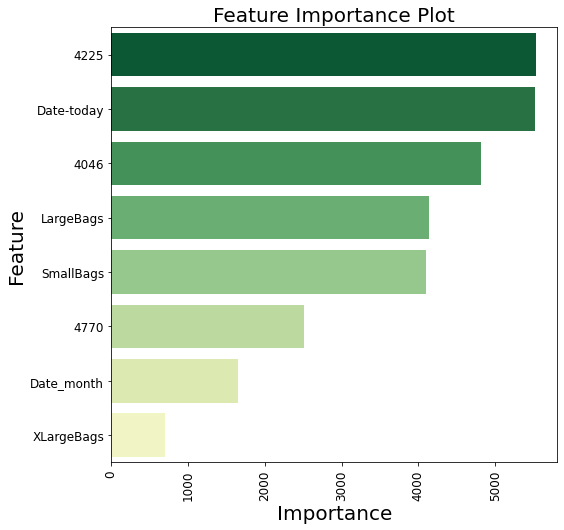

Feature Selection Plot Time taken : 0.25034499168395996
(14599, 8)
(14599,)

 #### SCALING ####
 #### SCALING DONE ####
(14599, 8)
(14599,)

 #### POWER TRANSFORMATIONS ####
 #### POWER TRANSFORMATIONS DONE ####
(14599, 8)
(14599,)

 #### Printing Sample Equation of the DATA ####

LINEAR REGRESSION EQUATION:


Predicted value = -5.689420272067079e-07*4046 + 1.403173729170494e-08*4225 + -5.84378457498668e-06*4770 + 1.246569495925211e-07*SmallBags + -1.7971702773008002e-06*LargeBags + -6.132005851581471e-07*XLargeBags + 0.012182617932805926*Date_month + -0.00013101813733293238*Date-today + 1.6448595065497154

R squared = 0.31
(The closer R squared is to 1, the better the model is)
 #### DONE ####

This is final shape of X_train : (14599, 8)
This is final shape of Y_train : (14599,)


 #### SAVING INIT INFORMATION ####
 #### DONE ####

 TOTAL TRAINING DATA CLEANING AND PLOTS : 18.548454761505127

	 #### VALIDATION AND SCORING ZONE ####
Runnning Date Engineering on validation dataset

	 En


num_df - (3650, 8)
disc_df - (3650, 4)
DATE_DF - (3650, 4)
TEXT_DF - (0, 0)
LAT_LONG_DF - (0, 0)
EMAIL_DF - (0, 0)
URL_DF - (0, 0)
Applying Target Encoding...
Target Encoding completed
Applying Scaling and Transformations on Validation Set...
Scaling and Transformation completed

This is final shape of X_test : (3650, 8)

 #### PRINTING THE LIST OF COLUMNS AND ITS TYPES THAT ENTER THE MODEL TRAINING ####
#### PRINTING X_test ####
Index(['4046', '4225', '4770', 'SmallBags', 'LargeBags', 'XLargeBags',
       'Date_month', 'Date-today'],
      dtype='object')
4046          float64
4225          float64
4770          float64
SmallBags     float64
LargeBags     float64
XLargeBags    float64
Date_month    float64
Date-today    float64
dtype: object


        4046      4225      4770  SmallBags  LargeBags  XLargeBags  \
0   0.405385  0.048677  0.723372   0.097285   0.066770    0.000000   
1   0.093447  0.001559  0.000000   0.018286   0.000000    0.000000   
2   0.002003  0.063760  0.000000  

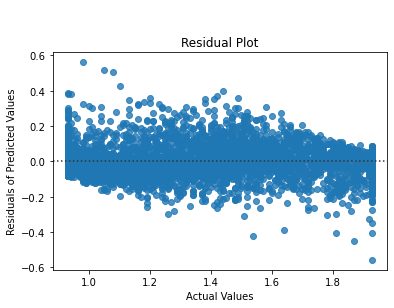

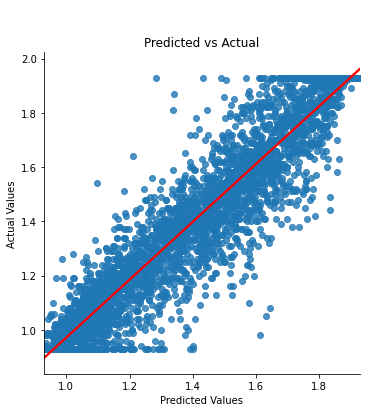


Distribution of Mean of Actual and Predicted Values by Deciles:
+----------+--------------------+-----------------------+
|   Decile |   Actualvalue_mean |   Predictedvalue_mean |
|----------+--------------------+-----------------------|
|        1 |               1.93 |                  1.82 |
|        2 |               1.83 |                  1.74 |
|        3 |               1.66 |                  1.63 |
|        4 |               1.54 |                  1.54 |
|        5 |               1.43 |                  1.45 |
|        6 |               1.31 |                  1.34 |
|        7 |               1.2  |                  1.23 |
|        8 |               1.1  |                  1.14 |
|        9 |               0.99 |                  1.06 |
|       10 |               0.93 |                  1    |
+----------+--------------------+-----------------------+


In [ ]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import targetAnalysis
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from engineerings import numeric_engineering
def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        print("Attempting to import 30 rows of the dataset")
        df,csvPath = importFile(path,nrows=30)
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df,update = dataHandler(df) # If first few rows contains unnecessary info
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nInitial Import Failed, Quitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df,update = dataHandler(df) # If first few rows contains unnecessary info
            if update is True: #If columns are removed in dataHandler() 
                cols = df.columns.to_list()
                cols.remove(info['target'])
                info['cols'] = cols
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                target = info['target']
                print("###Performing Initial Numeric Engineering for Capping Purposes###")
                dfsamp = df.sample(n=1000,random_state=1) if len(df)>1000 else df.copy()
                dfsamp = numeric_engineering(dfsamp)
                dfsamp = dfsamp.dropna(axis=0,subset=[target])
                print("###Estimating the type of target for Capping Purposes###")
                class_or_Reg = targetAnalysis(dfsamp[target])                    
                if class_or_Reg == 'Classification':
                    if len(df) >1000000:
                        df_train, _ = train_test_split(df, train_size=1000000,random_state=1, stratify=df[target])
                        print("Dataset size has been capped to 1 million rows for better performance")
                        print("Length of the dataset is now",len(df_train))
                        init_info,validation = INIT(df_train,info)
                    else:
                        print("Dataset has not been capped")
                        print("Length of the dataset is same as original",len(df))
                        init_info,validation = INIT(df,info)
                elif class_or_Reg == 'Regression':
                    dfr = df.sample(n=1000000, random_state=1) if len(df)>1000000 else df.copy()
                    print("Dataset size has been capped to 1 million rows for better performance")
                    print("Length of the dataset is now",len(dfr))
                    init_info,validation = INIT(dfr,info)
                elif class_or_Reg is None:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [ ]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)

# Set CSS properties for th elements in dataframe
th_prop = [
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'Black'),
    ('border', '0.5px') ,
    ('border', 'solid black'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_prop = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid black'),
    ('color', 'black'),
    ('font-family', 'arial')
  ]

# Set table styles
styls = [
  dict(selector="th", props=th_prop),
  dict(selector="td", props=td_prop),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

# pre.style.set_table_styles(styls).set_caption("Preview of Test Dataset(100 rows) with Predictions and Actual Values")

pre # to display only upto 3 decimal places

In [ ]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '0.5px') ,
    ('border', 'solid #0c405a'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid #0c405a')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):           # setting different color for F1 or RMSE column
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:          # for setting caption
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)       # adjusting index
if 'Weighted F1' in MC.columns:        #for setting decimal places
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(3)
else:
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(2)
    
mc

In [ ]:
# joblib.load('XT').min().min()


In [ ]:
# joblib.load('Xt').min().min()

In [ ]:
# joblib.load('XT').max().max()

In [ ]:
# joblib.load('Xt').max().max()

In [ ]:
# joblib.load('YT').max()

In [ ]:
# joblib.load('Yt').max()

In [ ]:
# joblib.load('YT').min()

In [ ]:
# joblib.load('Yt').min()

In [ ]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
